# Case Study: Solving Human Resources Problems

## Preparation

### Prepare the required library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine

### Prepare the data that will be used

In [3]:
URL = "DATABASE_URL"

engine = create_engine(URL)
employee_df = pd.read_sql_table(table_name="employee", con=engine.connect())
employee_df.head()

,index,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,...,2,80,1,7,2,3,6,2,1,2
1,1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,...,1,80,0,15,2,1,1,0,0,0
2,2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,...,3,80,3,18,2,4,10,0,2,7
3,3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,...,4,80,1,23,2,4,20,4,4,8
4,4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [4]:
employee_df.isnull().sum()

index                         0
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLife

In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     1470 non-null   int64  
 1   EmployeeId                1470 non-null   int64  
 2   Age                       1470 non-null   int64  
 3   Attrition                 1058 non-null   float64
 4   BusinessTravel            1470 non-null   object 
 5   DailyRate                 1470 non-null   int64  
 6   Department                1470 non-null   object 
 7   DistanceFromHome          1470 non-null   int64  
 8   Education                 1470 non-null   int64  
 9   EducationField            1470 non-null   object 
 10  EmployeeCount             1470 non-null   int64  
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1470 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 14  JobInvol

In [6]:
employee_df.columns.map(type)

Index([<class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sql.elements.quoted_name'>,
       <class 'sqlalchemy.sq

In [7]:
employee_df.describe(include="all")

,index,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,734.500000,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'JobSatisfaction'}>]], dtype=object)

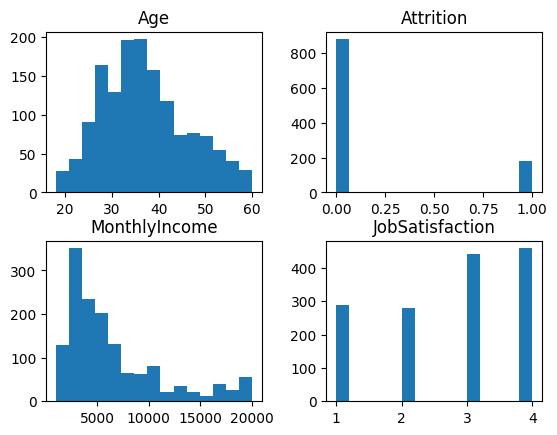

In [8]:
numerical = ["Age", "Attrition", "MonthlyIncome", "JobSatisfaction"]
employee_df[numerical].hist(bins=15, grid=False)

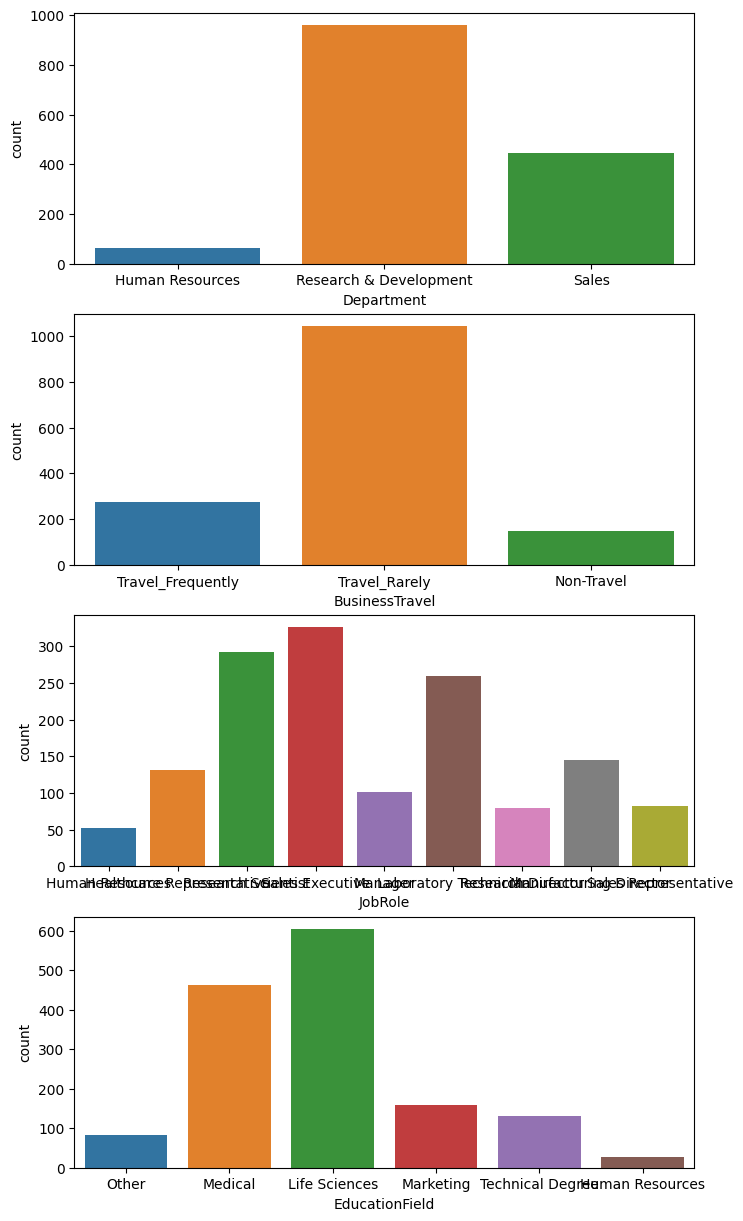

In [9]:
categorical = ["Department", "BusinessTravel", "JobRole", "EducationField"]

fig, ax = plt.subplots(len(categorical), 1, figsize=(8, 15))
for i, feature in enumerate(categorical):
    sns.countplot(data=employee_df, x=feature, hue=feature, ax=ax[i])
plt.show()

In [10]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

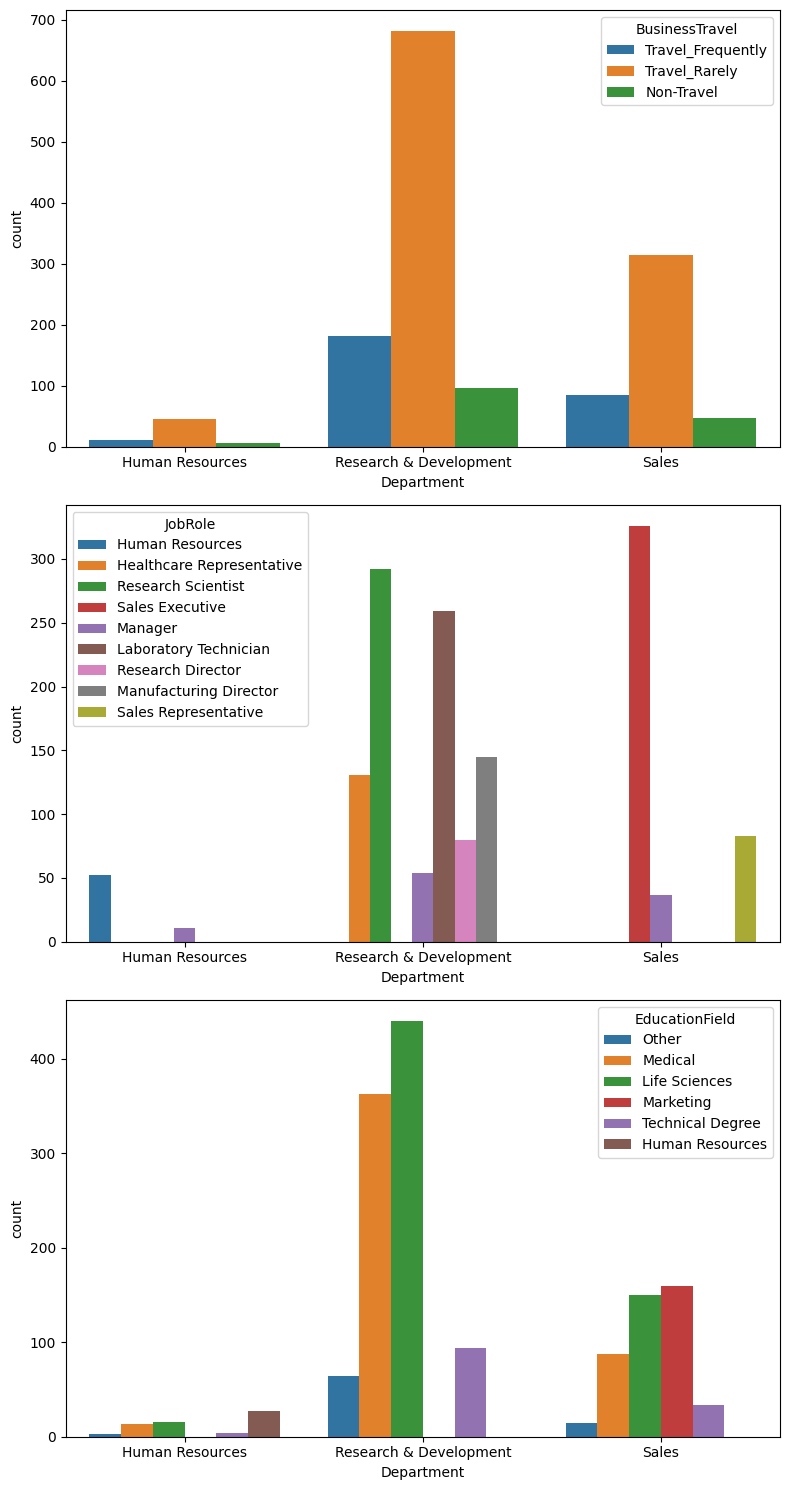

In [11]:
categorical_plot(
    features=["BusinessTravel", "JobRole", "EducationField"],
    df=employee_df,
    segment_feature="Department"
)

In [12]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

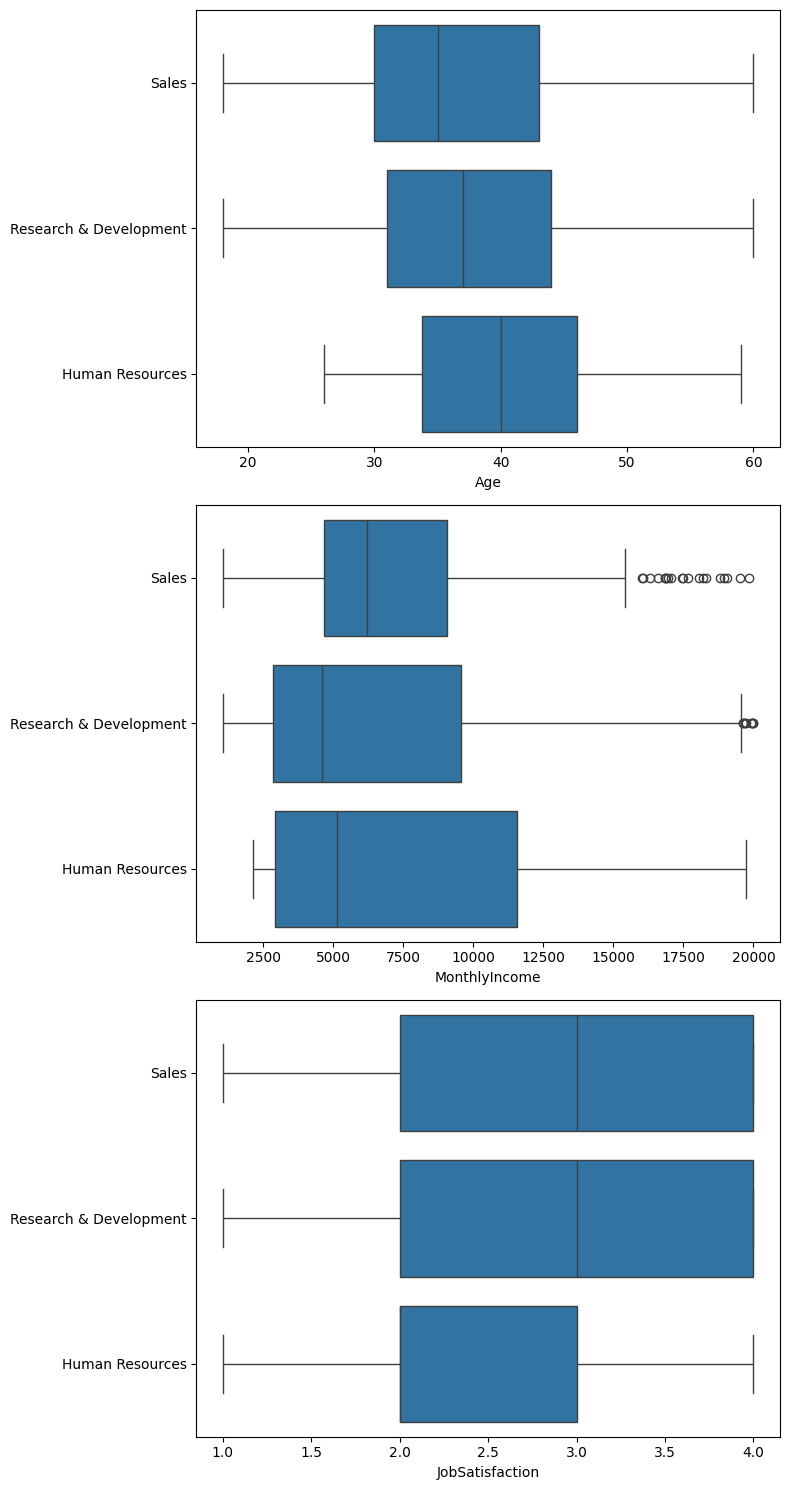

In [13]:
numerical_dis_plot(
    features=["Age", "MonthlyIncome", "JobSatisfaction"], 
    df=employee_df[employee_df["Attrition"] == 0], 
    segment_feature="Department"
)

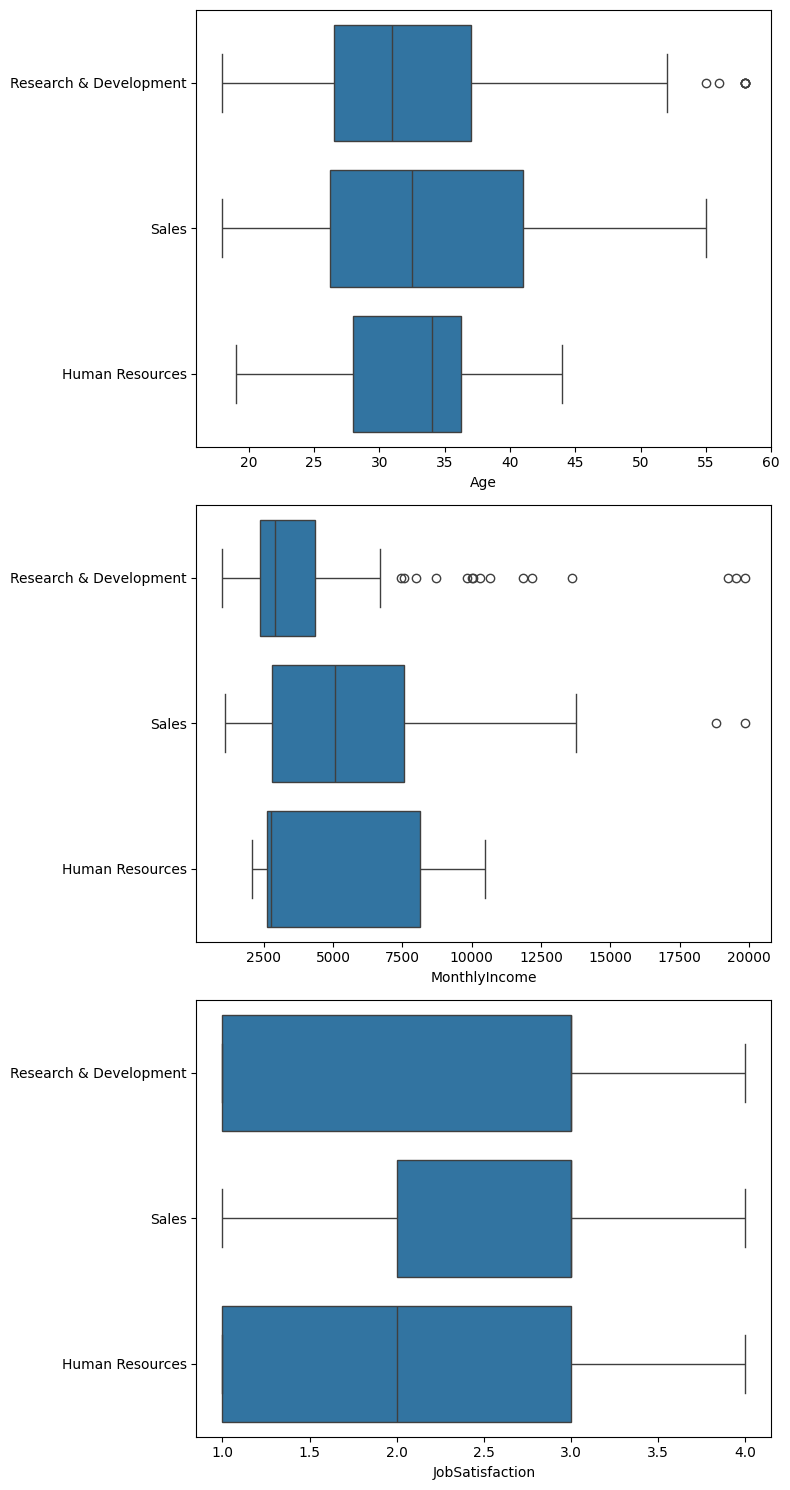

In [14]:
numerical_dis_plot(
    features=["Age", "MonthlyIncome", "JobSatisfaction"], 
    df=employee_df[employee_df["Attrition"] == 1], 
    segment_feature="Department"
)

## Data Preparation / Preprocessing

In [15]:
main_df = employee_df[["Age", "Attrition", "MonthlyIncome", "JobSatisfaction", "Department", "BusinessTravel", "JobRole", "EducationField"]]
main_df.head()

,Age,Attrition,MonthlyIncome,JobSatisfaction,Department,BusinessTravel,JobRole,EducationField
0,38,NaN,2991,2,Human Resources,Travel_Frequently,Human Resources,Other
1,37,1.0,4777,2,Research & Development,Travel_Rarely,Healthcare Representative,Medical
2,51,1.0,2461,3,Research & Development,Travel_Rarely,Research Scientist,Life Sciences
3,42,0.0,13525,2,Sales,Travel_Frequently,Sales Executive,Marketing
4,40,NaN,2001,3,Research & Development,Travel_Rarely,Research Scientist,Medical


In [16]:
main_df.columns = [str(col) for col in main_df.columns]
main_df.head()

,Age,Attrition,MonthlyIncome,JobSatisfaction,Department,BusinessTravel,JobRole,EducationField
0,38,NaN,2991,2,Human Resources,Travel_Frequently,Human Resources,Other
1,37,1.0,4777,2,Research & Development,Travel_Rarely,Healthcare Representative,Medical
2,51,1.0,2461,3,Research & Development,Travel_Rarely,Research Scientist,Life Sciences
3,42,0.0,13525,2,Sales,Travel_Frequently,Sales Executive,Marketing
4,40,NaN,2001,3,Research & Development,Travel_Rarely,Research Scientist,Medical


In [17]:
main_df.columns.map(type)

Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>],
      dtype='object')

In [18]:
kmeans_df = main_df[main_df["Attrition"].notnull()]
kmeans_df.head()

,Age,Attrition,MonthlyIncome,JobSatisfaction,Department,BusinessTravel,JobRole,EducationField
1,37,1.0,4777,2,Research & Development,Travel_Rarely,Healthcare Representative,Medical
2,51,1.0,2461,3,Research & Development,Travel_Rarely,Research Scientist,Life Sciences
3,42,0.0,13525,2,Sales,Travel_Frequently,Sales Executive,Marketing
6,40,0.0,7457,4,Sales,Travel_Rarely,Sales Executive,Medical
7,55,1.0,19859,1,Research & Development,Travel_Rarely,Manager,Medical


In [19]:
evaluate_df = main_df[main_df["Attrition"].isnull()]
evaluate_df["Attrition"] = evaluate_df["Attrition"].fillna(0)
evaluate_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13428\1499128286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evaluate_df["Attrition"] = evaluate_df["Attrition"].fillna(0)


,Age,Attrition,MonthlyIncome,JobSatisfaction,Department,BusinessTravel,JobRole,EducationField
0,38,0.0,2991,2,Human Resources,Travel_Frequently,Human Resources,Other
4,40,0.0,2001,3,Research & Development,Travel_Rarely,Research Scientist,Medical
5,29,0.0,2804,2,Human Resources,Travel_Rarely,Human Resources,Medical
12,47,0.0,4591,3,Sales,Travel_Rarely,Sales Executive,Medical
18,25,0.0,5206,3,Research & Development,Travel_Frequently,Manufacturing Director,Life Sciences


In [20]:
category_features = ["Department", "BusinessTravel", "JobRole", "EducationField"]

encoding_kmeans_df = pd.get_dummies(kmeans_df[category_features], dtype=int)
encoding_kmeans_df = pd.concat([kmeans_df, encoding_kmeans_df], axis=1)
encoding_kmeans_df = encoding_kmeans_df.drop(columns=category_features)

encoding_evaluate_df = pd.get_dummies(evaluate_df[category_features], dtype=int)
encoding_evaluate_df = pd.concat([evaluate_df, encoding_evaluate_df], axis=1)
encoding_evaluate_df = encoding_evaluate_df.drop(columns=category_features)

In [21]:
encoding_kmeans_df.head()

,Age,Attrition,MonthlyIncome,JobSatisfaction,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
1,37,1.0,4777,2,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,51,1.0,2461,3,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,42,0.0,13525,2,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
6,40,0.0,7457,4,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
7,55,1.0,19859,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [22]:
encoding_evaluate_df.head()

,Age,Attrition,MonthlyIncome,JobSatisfaction,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,38,0.0,2991,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,40,0.0,2001,3,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,29,0.0,2804,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
12,47,0.0,4591,3,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
18,25,0.0,5206,3,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
scaler = StandardScaler()

transformed_kmeans_df = encoding_kmeans_df.copy()
scaled_data = scaler.fit_transform(transformed_kmeans_df)
transformed_kmeans_df.iloc[:] = scaled_data
transformed_kmeans_df.head()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13428\3105693559.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.00592874  1.48248729  0.52564841 ... -0.96276762  0.31301755
 -1.9196065 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  transformed_kmeans_df.iloc[:] = scaled_data
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13428\3105693559.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.38237623 -0.86134303  1.42677814 ... -0.85017541 -0.63737021
 -0.88946888]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  transformed_kmeans_df.iloc[:] = scaled_data
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13428\3105693559.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.67915221  0.226955

,Age,Attrition,MonthlyIncome,JobSatisfaction,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
1,-0.005929,2.215991,-0.382376,-0.679152,-0.193015,0.713633,-0.657012,-0.33543,-0.490233,0.646707,...,-0.249497,-0.503542,-0.529973,-0.240832,-0.119923,-0.837236,-0.361029,1.485281,-0.243021,-0.315899
2,1.482487,2.215991,-0.861343,0.226955,-0.193015,0.713633,-0.657012,-0.33543,-0.490233,0.646707,...,-0.249497,1.985932,-0.529973,-0.240832,-0.119923,1.194406,-0.361029,-0.673273,-0.243021,-0.315899
3,0.525648,-0.451265,1.426778,-0.679152,-0.193015,-1.401280,1.522043,-0.33543,2.039847,-1.546294,...,-0.249497,-0.503542,1.886888,-0.240832,-0.119923,-0.837236,2.769861,-0.673273,-0.243021,-0.315899
6,0.313018,-0.451265,0.171869,1.133062,-0.193015,-1.401280,1.522043,-0.33543,-0.490233,0.646707,...,-0.249497,-0.503542,1.886888,-0.240832,-0.119923,-0.837236,-0.361029,1.485281,-0.243021,-0.315899
7,1.907749,2.215991,2.736699,-1.585259,-0.193015,0.713633,-0.657012,-0.33543,-0.490233,0.646707,...,-0.249497,-0.503542,-0.529973,-0.240832,-0.119923,-0.837236,-0.361029,1.485281,-0.243021,-0.315899


In [24]:
transformed_evaluate_df = encoding_evaluate_df.copy()
scaled_data = scaler.fit_transform(transformed_evaluate_df)
transformed_evaluate_df.iloc[:] = scaled_data
transformed_evaluate_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13428\1547881136.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.16887896  0.40756896 -0.90522601  1.24298393 -1.38260599  1.48167393
 -1.50195099  1.24298393  0.76560395  0.16887896 -0.78588101  1.60101892
 -0.30850102 -0.78588101 -0.18915603  1.00429394  1.83970892 -1.143916
  1.48167393  2.5557789  -0.66653601 -0.66653601 -0.30850102  1.24298393
 -0.06981103  1.12363894  0.64625895 -0.30850102  0.04953397 -1.74064098
 -0.90522601  1.95905391  2.19774391  1.12363894  0.16887896  0.28822396
 -0.78588101  0.28822396 -1.024571   -1.263261    0.88494894  0.52691395
  1.00429394  2.19774391 -0.42784602 -0.54719102 -0.90522601  2.3170889
 -1.143916   -1.263261   -0.30850102  0.64625895 -1.143916   -0.30850102
 -0.06981103  0.28822396  0.52691395  1.00429394  0.40756896  0.88494894
  1.60101892 -1.263261   -1.50195099  1.48167393 -0.66653601  0.40756896
 -0.54719102  1.

,Age,Attrition,MonthlyIncome,JobSatisfaction,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0.168879,0.0,-0.736153,-0.614713,3.934463,-1.307871,-0.667543,-0.341367,2.173067,-1.607050,...,-0.213741,-0.483252,-0.543689,-0.254164,-0.173205,-0.838140,-0.314113,-0.694273,4.112547,-0.309426
4,0.407569,0.0,-0.964183,0.296301,-0.254164,0.764601,-0.667543,-0.341367,-0.460179,0.622258,...,-0.213741,2.069312,-0.543689,-0.254164,-0.173205,-0.838140,-0.314113,1.440357,-0.243158,-0.309426
5,-0.905226,0.0,-0.779225,-0.614713,3.934463,-1.307871,-0.667543,-0.341367,-0.460179,0.622258,...,-0.213741,-0.483252,-0.543689,-0.254164,-0.173205,-0.838140,-0.314113,1.440357,-0.243158,-0.309426
12,1.242984,0.0,-0.367620,0.296301,-0.254164,-1.307871,1.498030,-0.341367,-0.460179,0.622258,...,-0.213741,-0.483252,1.839288,-0.254164,-0.173205,-0.838140,-0.314113,1.440357,-0.243158,-0.309426
18,-1.382606,0.0,-0.225965,0.296301,-0.254164,0.764601,-0.667543,-0.341367,2.173067,-1.607050,...,-0.213741,-0.483252,-0.543689,-0.254164,-0.173205,1.193118,-0.314113,-0.694273,-0.243158,-0.309426


## Modeling

In [25]:
K = 2

model = KMeans(n_clusters=K, random_state=75)
model.fit(transformed_kmeans_df)

joblib.dump(model, "kmeans_clustering_model.joblib")

['kmeans_clustering_model.joblib']

## Evaluation

In [26]:
clusters = model.predict(transformed_evaluate_df)

evaluate_df["Clusters_segment"] = clusters.astype(int)
evaluate_df.sample(5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13428\3087018287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evaluate_df["Clusters_segment"] = clusters.astype(int)


,Age,Attrition,MonthlyIncome,JobSatisfaction,Department,BusinessTravel,JobRole,EducationField,Clusters_segment
697,18,0.0,1569,4,Sales,Travel_Frequently,Sales Representative,Medical,1
859,40,0.0,3377,1,Research & Development,Travel_Rarely,Laboratory Technician,Life Sciences,0
26,24,0.0,2296,1,Research & Development,Travel_Rarely,Laboratory Technician,Technical Degree,0
852,23,0.0,1790,1,Sales,Travel_Frequently,Sales Representative,Marketing,1
909,40,0.0,5677,2,Sales,Travel_Rarely,Sales Executive,Marketing,1


<Axes: xlabel='count', ylabel='Clusters_segment'>

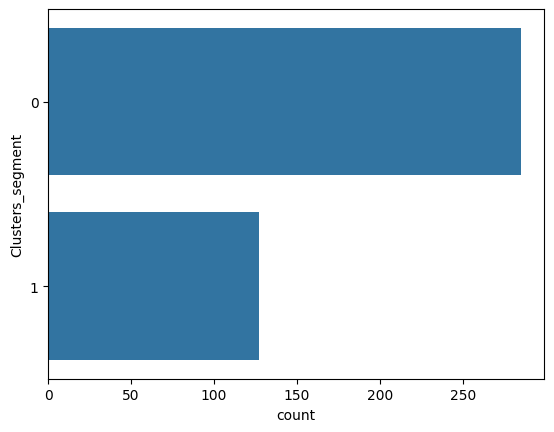

In [27]:
sns.countplot(data=evaluate_df, y="Clusters_segment")

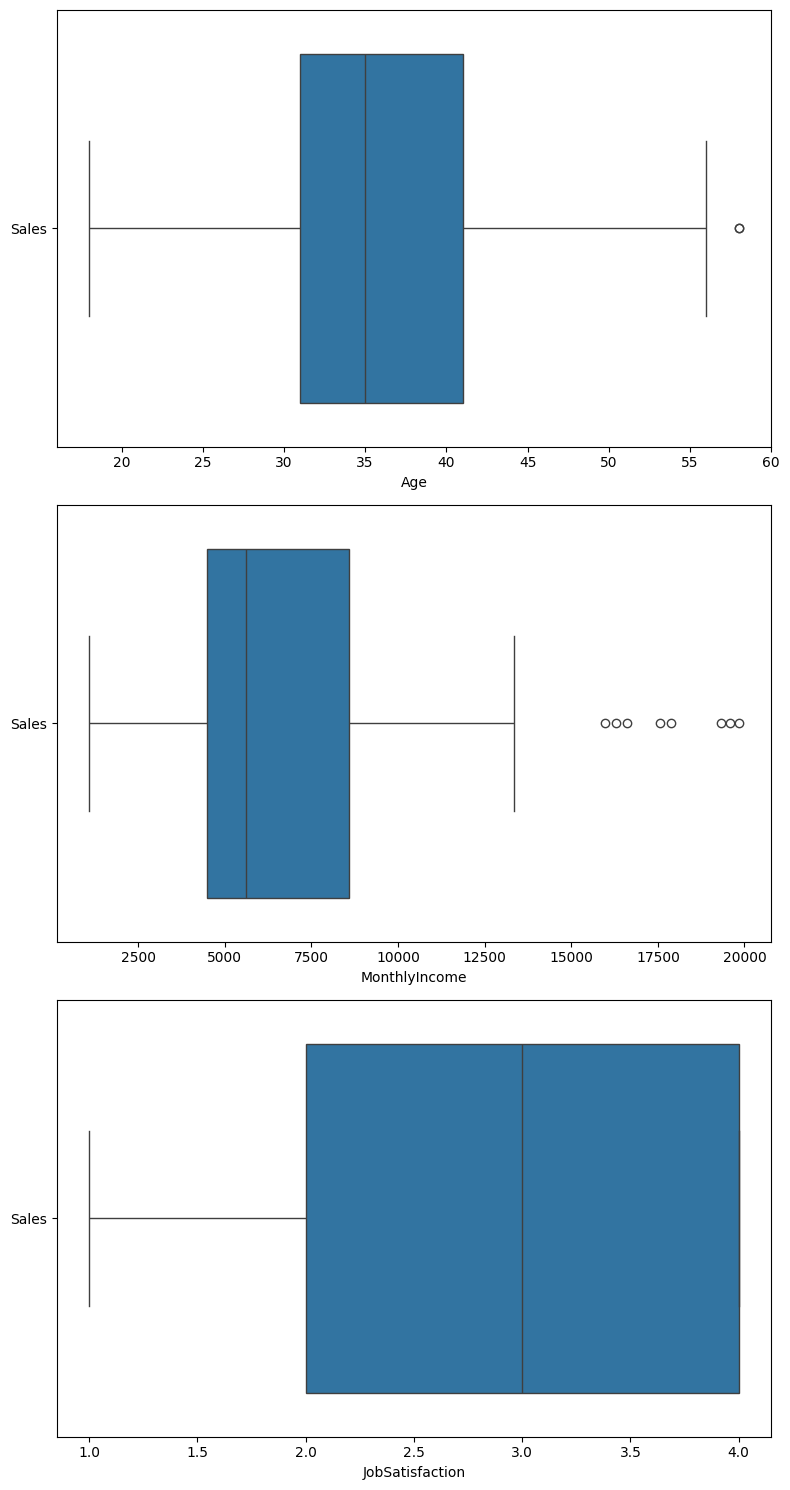

In [28]:
numerical_dis_plot(
    features=["Age", "MonthlyIncome", "JobSatisfaction"], 
    df=evaluate_df[evaluate_df["Clusters_segment"] == 1], 
    segment_feature="Department"
)

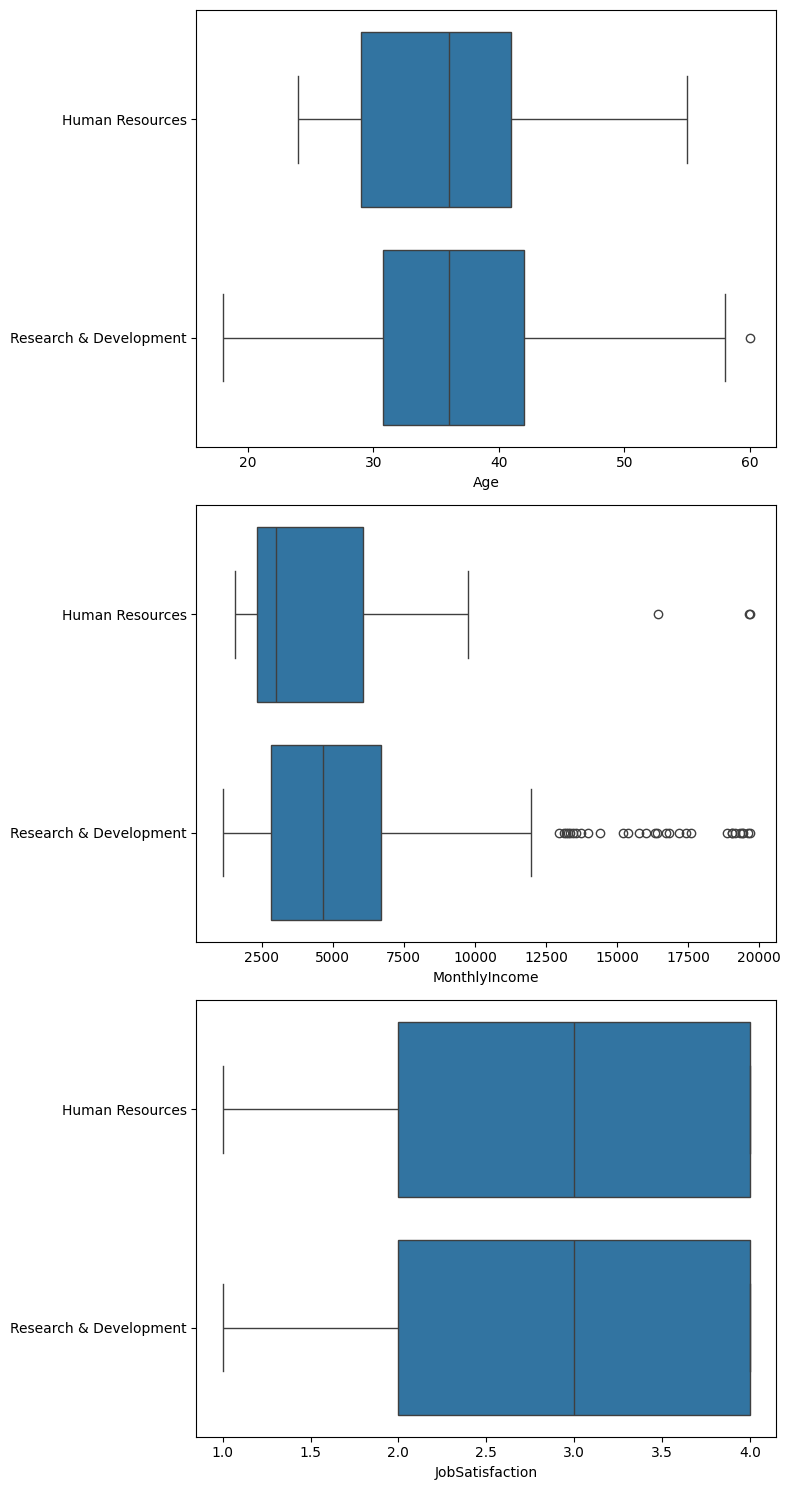

In [29]:
numerical_dis_plot(
    features=["Age", "MonthlyIncome", "JobSatisfaction"], 
    df=evaluate_df[evaluate_df["Clusters_segment"] == 0], 
    segment_feature="Department"
)